## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)
data_df = pd.merge(mouse_df, study_df, how='inner')
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
data_df.rename(columns={'Mouse ID': 'ID'}, inplace=True)
mice_count = len(data_df.ID.unique())
print(f'NUMBER OF MICE: {mice_count}')

NUMBER OF MICE: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data_df = pd.DataFrame(data_df[data_df.duplicated(['ID', 'Timepoint'])])
print(duplicate_data_df)

       ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909  g989     Propriva  Female          21          26          0   
911  g989     Propriva  Female          21          26          5   
913  g989     Propriva  Female          21          26         10   
915  g989     Propriva  Female          21          26         15   
917  g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df.drop_duplicates(subset='ID')
clean_df

,ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_df.ID.unique())
print(f'NUMBER OF MICE: {mice_count}')

NUMBER OF MICE: 249


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
#group_by for drug regimen
drug_r = data_df.groupby('Drug Regimen')
median = drug_r.median()['Tumor Volume (mm3)']
mean = drug_r.mean()['Tumor Volume (mm3)']
variance = 0 #np.var(drug_r['Tumor Volume (mm3)'])
stdev = drug_r.std()['Tumor Volume (mm3)']
sem = 0
summary1 = {'Summary': [median, mean, variance, stdev, sem]}
print(summary1)
#data_df.describe() 
# This method is the most straightforward, creating multiple series and putting them all together at the end.

{'Summary': [Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64, Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64, 0, Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64, 0]}


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#  and SEM of the tumor volume for each regimen
data_df.describe(include=['object'])
# This method produces everything in a single groupby function.

,ID,Drug Regimen,Sex
count,1893,1893,1893
unique,249,10,2
top,g989,Capomulin,Male
freq,13,230,958


## Bar Plots

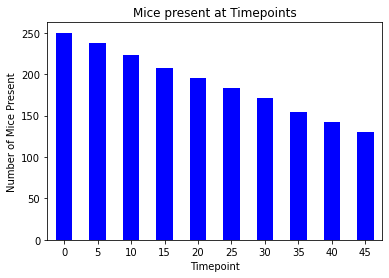

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas
df = data_df.groupby(['Timepoint'])['ID'].count()
bar1 = df.plot.bar(y='Number of Mice Present', rot=0, color='blue')
bar1.set_title('Mice present at Timepoints')
bar1.set_ylabel('Number of Mice Present')
bar1

Text(0, 0.5, 'Number of Mice Present')

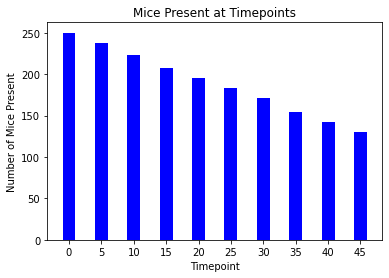

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pyplot.
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
height_2 = df

bar2 = plt.bar(height=height_2, x=x_ticks, tick_label=x_ticks, color='blue', width=2)
plt.title('Mice Present at Timepoints')
plt.xlabel('Timepoint')
plt.ylabel('Number of Mice Present')

## Pie Plots

Text(0.5, 1.0, 'Gender Distribution of Mice')

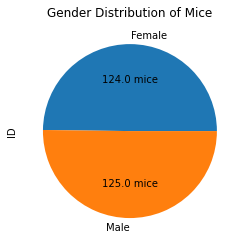

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df2 = clean_df.groupby(['Sex'])['ID'].count()
def percent(val):
    perc = np.round(val/100.*sizes.sum(), 0)
    return f'{perc} mice'

df2.plot.pie(autopct=percent)
plt.title('Gender Distribution of Mice')

Text(0.5, 1.0, 'Gender Distribution of Mice')

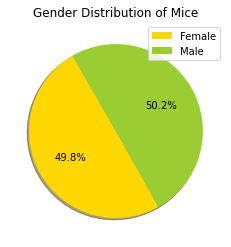

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
lable = 'Female', 'Male'
sizes = df2
colors = ['gold', 'yellowgreen']
explode = (0, 0) 
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=120) 
plt.legend(labels=lable, loc="best")
plt.title('Gender Distribution of Mice')

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df3 = data_df.groupby(['Timepoint'])
df3 

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
